In [5]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
# Membaca dataset dari folder /mnt
file_path = "./dataset_review_tukang.xlsx"  # Pastikan file dataset sudah ada di Google Colab
df = pd.read_excel(file_path)


In [7]:
# Menampilkan dataset untuk memastikan data terload
print("Dataset Loaded:")
print(df.head())

Dataset Loaded:
  Lokasi_Pengguna           Kebutuhan  Umur_Pengguna JenisKelamin_Pengguna  \
0           Medan  Pengecatan Dinding             55             Perempuan   
1           Garut   Instalasi Listrik             42             Perempuan   
2        Makassar  Pengecatan Dinding             35             Laki-laki   
3        Surabaya           Pasang AC             36             Perempuan   
4      Yogyakarta  Pengecatan Dinding             49             Perempuan   

   Rate                 Review Nama_Tukang Spesialis Lokasi_Tukang  \
0     2        Cepat dan ramah        Andi  Sanitasi      Makassar   
1     2        Hasil memuaskan         Eka  Sanitasi      Surabaya   
2     1        Hasil memuaskan        Budi       Cat    Yogyakarta   
3     2        Cepat dan ramah        Budi  Renovasi      Semarang   
4     1  Sangat cepat dan rapi        Rini  Sanitasi         Medan   

  JenisKelamin_Tukang  
0           Perempuan  
1           Perempuan  
2           Laki-laki 

In [8]:
# Inisialisasi geolocator
geolocator = Nominatim(user_agent="tukang_locator")

In [9]:
# Fungsi untuk mendapatkan koordinat berdasarkan nama lokasi
def get_coordinates(location_name):
    location = geolocator.geocode(location_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None  # Jika tidak ditemukan

In [10]:
# Menambahkan Latitude dan Longitude berdasarkan nama lokasi
df['Latitude'], df['Longitude'] = zip(*df['Lokasi_Tukang'].apply(lambda loc: get_coordinates(loc)))

In [11]:
# Menampilkan dataset yang telah diperbarui
print("\nDataset dengan Latitude dan Longitude:")
print(df[['Nama_Tukang', 'Lokasi_Tukang', 'Latitude', 'Longitude']].head())


Dataset dengan Latitude dan Longitude:
  Nama_Tukang Lokasi_Tukang  Latitude   Longitude
0        Andi      Makassar -5.134296  119.412428
1         Eka      Surabaya -7.245972  112.737827
2        Budi    Yogyakarta -7.977838  110.367226
3        Budi      Semarang -6.990399  110.422910
4        Rini         Medan  3.589665   98.673826


In [12]:
# Preprocessing Data
# Encoding kolom kategorikal menjadi numerik
label_encoders = {}
for col in ["Spesialis", "Lokasi_Tukang", "JenisKelamin_Tukang"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [13]:
# Fitur dan Target
X = df[["Spesialis", "Lokasi_Tukang", "JenisKelamin_Tukang"]]
y = df["Rate"]

In [14]:
# Normalisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Membangun Model TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output: Rate (angka)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Melatih Model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Evaluasi Model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"\nMean Absolute Error (MAE) pada data uji: {mae}")


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - loss: 12.5049 - mae: 3.2526 - val_loss: 9.1852 - val_mae: 2.7398
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 12.8419 - mae: 3.3025 - val_loss: 8.9265 - val_mae: 2.6918
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 12.4593 - mae: 3.2518 - val_loss: 8.6747 - val_mae: 2.6439
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.8624 - mae: 3.1567 - val_loss: 8.4285 - val_mae: 2.5963
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.6365 - mae: 3.1386 - val_loss: 8.1920 - val_mae: 2.5495
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.6216 - mae: 3.1253 - val_loss: 7.9587 - val_mae: 2.5024
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.5776 - mae: 3.1251 - val_loss: 7.7296 - val_mae: 2.4555
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.8902 - mae: 2.9933 - val_loss: 7.5059 - val_mae: 2.4091
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.9155 - mae:

In [29]:
# Menyimpan arsitektur model dalam format JSON
model_json = model.to_json()
json_model_path = "/mnt/data/tukang_rate_predictor_model.json"
with open(json_model_path, "w") as json_file:
    json_file.write(model_json)
print(f"\nArsitektur model disimpan di: {json_model_path}")

# Menyimpan bobot model dalam format HDF5 dengan ekstensi .weights.h5
model_weights_path = "/mnt/data/tukang_rate_predictor_weights.weights.h5"
model.save_weights(model_weights_path)
print(f"\nBobot model disimpan di: {model_weights_path}")



Arsitektur model disimpan di: /mnt/data/tukang_rate_predictor_model.json

Bobot model disimpan di: /mnt/data/tukang_rate_predictor_weights.weights.h5


In [19]:
# **Tukang dengan Rate Terbaik**
best_rate_tukang = df.nlargest(5, 'Rate')  # Mengambil 5 tukang dengan rate terbaik


In [20]:
# **Tukang dengan Lokasi Terdekat dari Semarang**
nearest_tukang = df[df['Lokasi_Tukang'] == 3]  # Asumsikan kode 3 adalah Semarang, sesuaikan jika perlu


In [21]:
# **Membuat Peta dengan Folium**
# Menentukan peta dengan pusat Semarang
semarang_coords = [-6.9667, 110.4194]  # Koordinat Semarang (latitude, longitude)
peta = folium.Map(location=semarang_coords, zoom_start=12)

In [22]:
# Menambahkan tukang dengan lokasi terdekat ke peta
for _, row in nearest_tukang.iterrows():
    # Menambahkan marker untuk tukang yang terdekat
    if row['Latitude'] and row['Longitude']:
        folium.Marker([row['Latitude'], row['Longitude']],
                      popup=f"{row['Nama_Tukang']} - Rate: {row['Rate']}").add_to(peta)


In [23]:
# Menyimpan peta ke file HTML
peta_path = "/mnt/data/tukang_location_map.html"
peta.save(peta_path)
print(f"Peta lokasi tukang telah disimpan di: {peta_path}")


Peta lokasi tukang telah disimpan di: /mnt/data/tukang_location_map.html


In [24]:
# **Visualisasi Hasil**
plt.figure(figsize=(14, 7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

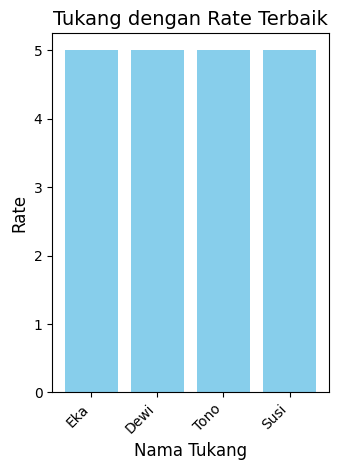

In [25]:
# **Diagram Tukang dengan Rate Terbaik**
plt.subplot(1, 2, 1)
plt.bar(best_rate_tukang['Nama_Tukang'], best_rate_tukang['Rate'], color='skyblue')
plt.title('Tukang dengan Rate Terbaik', fontsize=14)
plt.xlabel('Nama Tukang', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


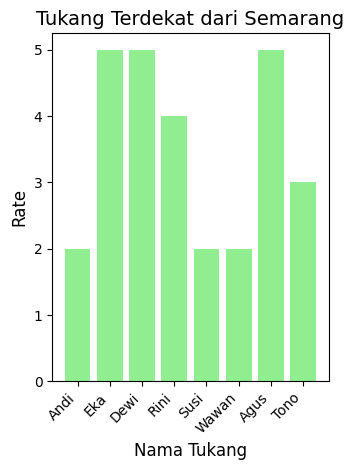

In [26]:
# **Diagram Tukang dengan Lokasi Terdekat dari Semarang**
plt.subplot(1, 2, 2)
plt.bar(nearest_tukang['Nama_Tukang'], nearest_tukang['Rate'], color='lightgreen')
plt.title('Tukang Terdekat dari Semarang', fontsize=14)
plt.xlabel('Nama Tukang', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
# Prediksi Contoh
example = [[0, 3, 1]]  # Contoh: Spesialis=0, Lokasi_Tukang=3, JenisKelamin_Tukang=1
example_scaled = scaler.transform(example)
predicted_rate = model.predict(example_scaled)
print(f"\nPrediksi Rate untuk contoh: {predicted_rate[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

Prediksi Rate untuk contoh: 2.688011407852173


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
